In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.ndimage import gaussian_filter
from scipy import optimize
from astropy.io import fits

from  matplotlib.colors import Normalize
from matplotlib.colors import LogNorm

from astropy.coordinates import SkyCoord
from astropy import units as u

## Read pointing list

In [3]:
pointing_list = np.loadtxt("guide_star_search_results_all_pointings/pointing_list")

In [4]:
n_pointings = pointing_list[:,0].astype(int)
ra_pointings = pointing_list[:,1]
dec_pointings = pointing_list[:,2]

In [5]:
len(pointing_list)

24595

In [7]:
min_mags = np.arange(10,19,1)

n_stars_000 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_060 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_120 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_180 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_240 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_300 = np.zeros((len(n_pointings),len(min_mags)))




for index1,n_pointing in enumerate(n_pointings):
    #print(n_pointing)
    if (index1%1000)==0:
        print("Pointing {} of {}".format(index1,len(n_pointings)))
        
    filename = "guide_star_search_results_all_pointings/guide_stars_{:06d}_pa_000".format(n_pointing)
    ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.loadtxt(filename)
    for index2,mag_lim in enumerate(min_mags):
        n_stars_000[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = "guide_star_search_results_all_pointings/guide_stars_{:06d}_pa_060".format(n_pointing)
    ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.loadtxt(filename)
    for index2,mag_lim in enumerate(min_mags):
        n_stars_060[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = "guide_star_search_results_all_pointings/guide_stars_{:06d}_pa_120".format(n_pointing)
    ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.loadtxt(filename)
    for index2,mag_lim in enumerate(min_mags):
        n_stars_120[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = "guide_star_search_results_all_pointings/guide_stars_{:06d}_pa_180".format(n_pointing)
    ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.loadtxt(filename)
    for index2,mag_lim in enumerate(min_mags):
        n_stars_180[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = "guide_star_search_results_all_pointings/guide_stars_{:06d}_pa_240".format(n_pointing)
    try:
        ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.loadtxt(filename)
    except:
        print("Problems with ",filename)
        gmag = np.array([99])
    for index2,mag_lim in enumerate(min_mags):
        n_stars_240[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = "guide_star_search_results_all_pointings/guide_stars_{:06d}_pa_300".format(n_pointing)

    try:
        ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.loadtxt(filename)
    except:
        print("Problems with ",filename)
        gmag = np.array([99])
    for index2,mag_lim in enumerate(min_mags):
        n_stars_300[index1,index2]+=np.sum(gmag<mag_lim)

    

Pointing 0 of 24595


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000021_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000021_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000021_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000021_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000198_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000198_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000198_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000198_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000230_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000230_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000231_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000231_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000230_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000230_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000231_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000231_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000262_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000262_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000292_pa_240"


Problems with  guide_star_search_results_all_pointings/guide_stars_000262_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000262_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000292_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000292_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000293_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000293_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000292_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000293_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000293_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000310_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000310_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarnin

Problems with  guide_star_search_results_all_pointings/guide_stars_000310_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000310_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000311_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000311_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000313_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000313_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000376_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000376_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000376_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000376_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000441_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000441_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000441_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000441_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000471_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000471_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000473_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000473_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000471_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000471_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000473_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000473_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000501_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000501_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000503_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000503_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000501_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000501_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000503_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000503_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000530_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000530_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000530_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000530_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000560_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000560_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000561_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000561_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000560_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000560_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000561_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000561_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000591_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000591_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000591_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000591_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000765_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000765_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000765_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000765_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000793_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000793_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000793_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000793_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000876_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000876_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000876_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000876_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000907_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000907_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000907_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000907_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000934_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000934_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000934_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000934_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000959_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000959_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000960_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_000960_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_000959_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000959_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_000960_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_000960_pa_300
Pointing 1000 of 24595


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_001064_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_001064_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_001064_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_001064_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_001118_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_001118_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_001118_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_001118_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_001146_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_001146_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_001146_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_001146_pa_300
Pointing 2000 of 24595
Pointing 3000 of 24595
Pointing 4000 of 24595


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_004983_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_004983_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_004984_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_004984_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_004983_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_004983_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_004984_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_004984_pa_300
Pointing 5000 of 24595


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_005815_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_005815_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_005815_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_005815_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_005883_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_005883_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_005883_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_005883_pa_300
Pointing 6000 of 24595


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006383_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006383_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_006383_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006383_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006413_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006413_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006414_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006414_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_006413_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006413_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_006414_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006414_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006437_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006437_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006439_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006439_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006445_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarnin

Problems with  guide_star_search_results_all_pointings/guide_stars_006437_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006437_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_006439_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006439_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_006445_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006445_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006508_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006508_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_006508_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006508_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006586_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006586_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_006586_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006586_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006659_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006659_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_006659_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006659_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006990_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_006990_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_006990_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_006990_pa_300
Pointing 7000 of 24595


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007051_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007051_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007051_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007051_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007077_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007077_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007077_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007077_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007102_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007102_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007104_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007104_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007102_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007102_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_007104_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007104_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007126_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007126_pa_300"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007129_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007129_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007126_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007126_pa_300
Problems with  guide_star_search_results_all_pointings/guide_stars_007129_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007129_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007580_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007580_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007580_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007580_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007635_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007635_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007635_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007635_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007657_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007657_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007657_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007657_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007807_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007807_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007807_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007807_pa_300


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007915_pa_240"
/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: loadtxt: Empty input file: "guide_star_search_results_all_pointings/guide_stars_007915_pa_300"


Problems with  guide_star_search_results_all_pointings/guide_stars_007915_pa_240
Problems with  guide_star_search_results_all_pointings/guide_stars_007915_pa_300
Pointing 8000 of 24595
Pointing 9000 of 24595
Pointing 10000 of 24595
Pointing 11000 of 24595
Pointing 12000 of 24595
Pointing 13000 of 24595
Pointing 14000 of 24595
Pointing 15000 of 24595
Pointing 16000 of 24595
Pointing 17000 of 24595
Pointing 18000 of 24595
Pointing 19000 of 24595
Pointing 20000 of 24595
Pointing 21000 of 24595
Pointing 22000 of 24595
Pointing 23000 of 24595
Pointing 24000 of 24595


In [8]:
n_stars_single = n_stars_000
n_stars_double = n_stars_000 + n_stars_180

n_stars_opti = np.max([n_stars_000+n_stars_180,n_stars_060+n_stars_240,n_stars_120+n_stars_300],axis=0)

In [9]:
n_stars_opti.shape

(24595, 9)

In [10]:
n_stars_single.shape

(24595, 9)

In [11]:
np.sum(n_stars_single[:,4]>200)

6431

In [12]:
np.sum(n_stars_opti[:,4]>200)

16223

In [14]:
n_stars = n_stars_single

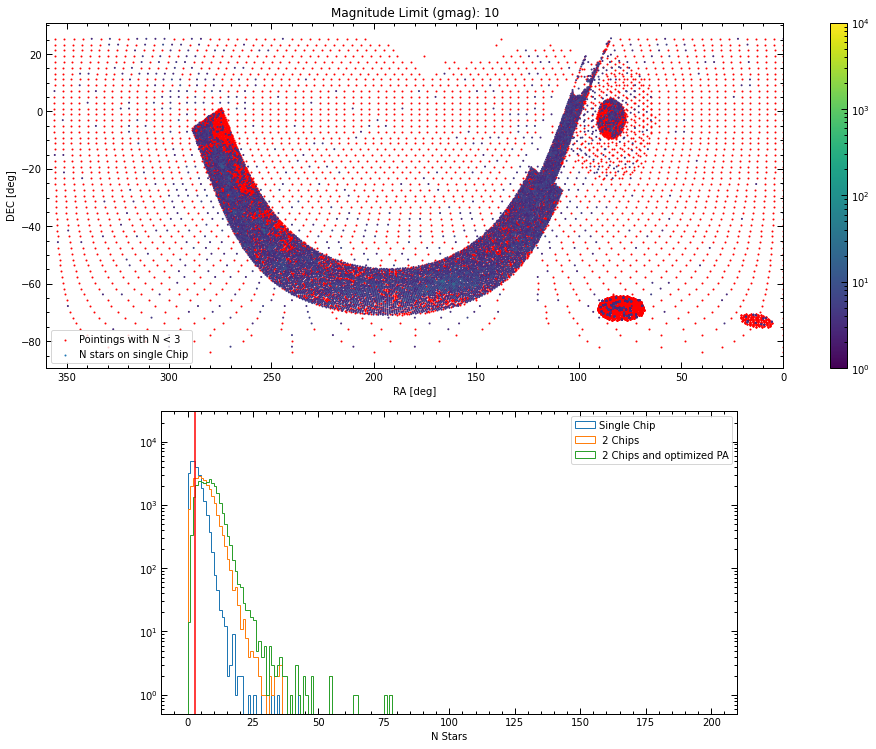

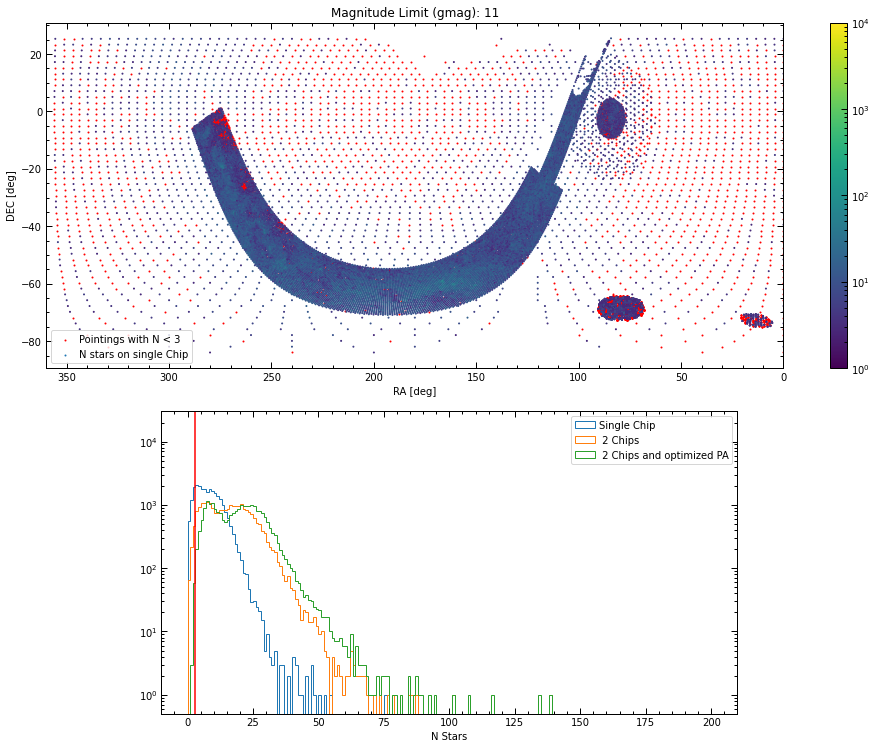

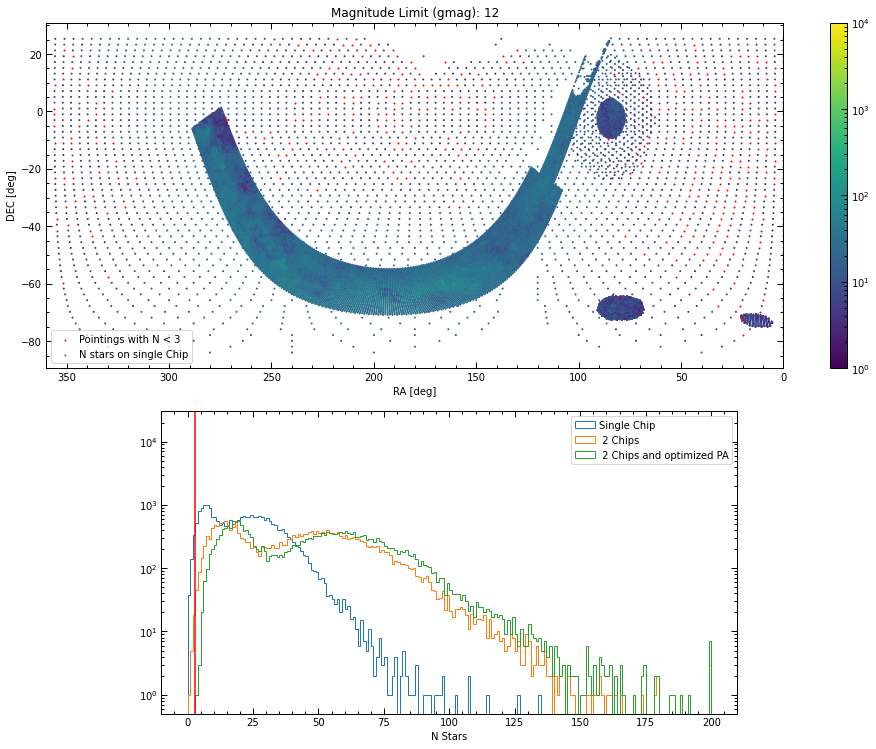

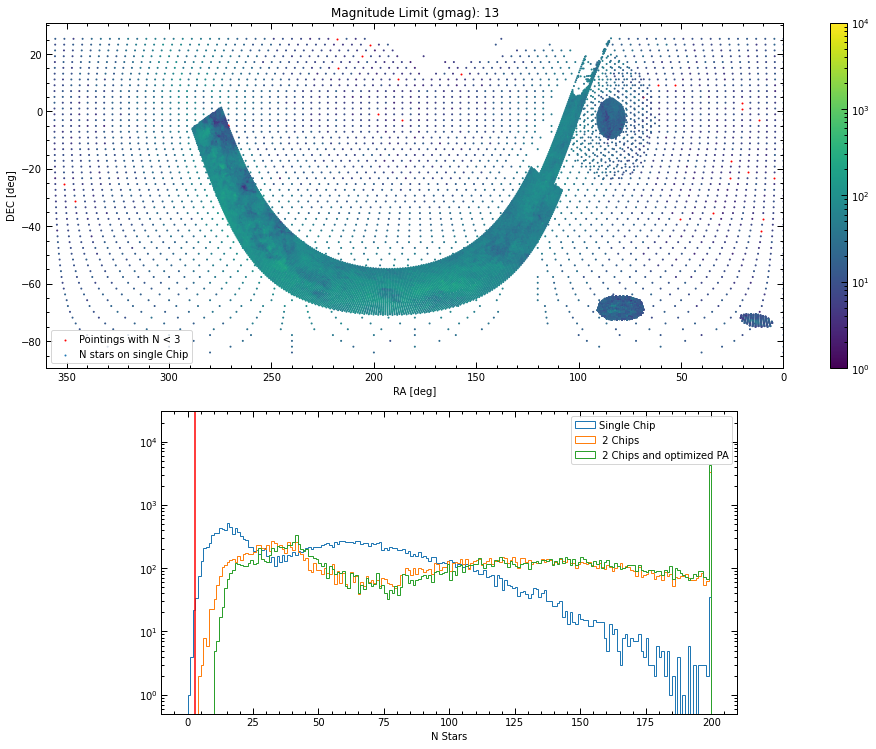

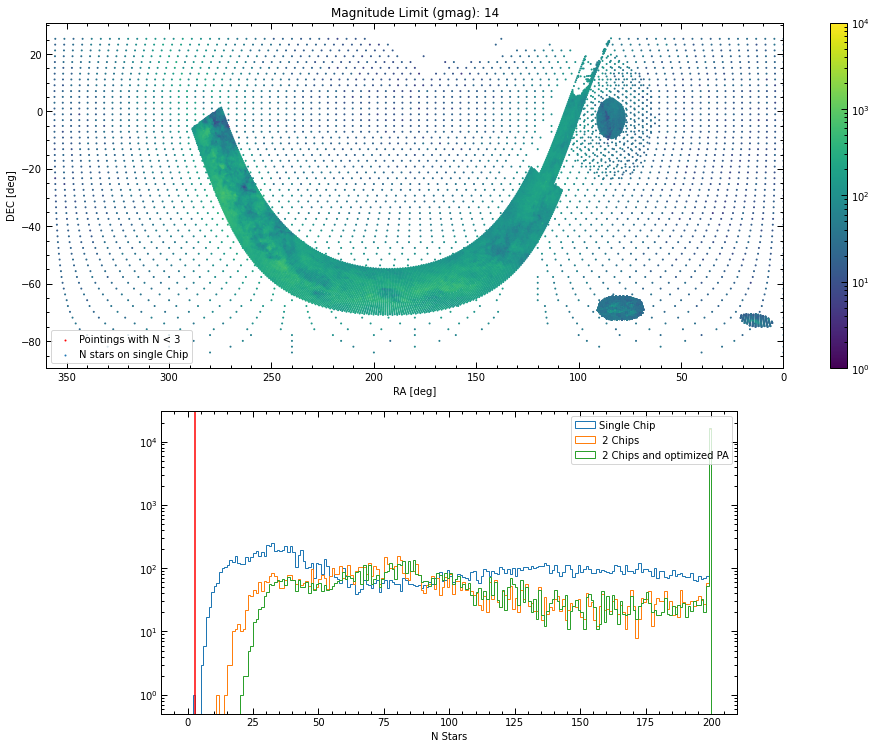

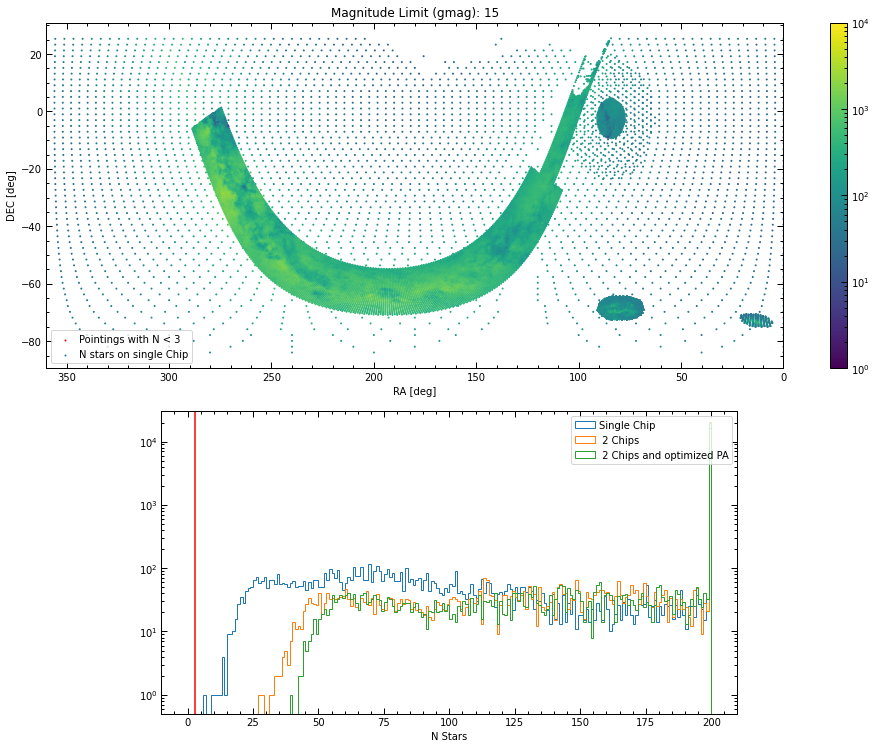

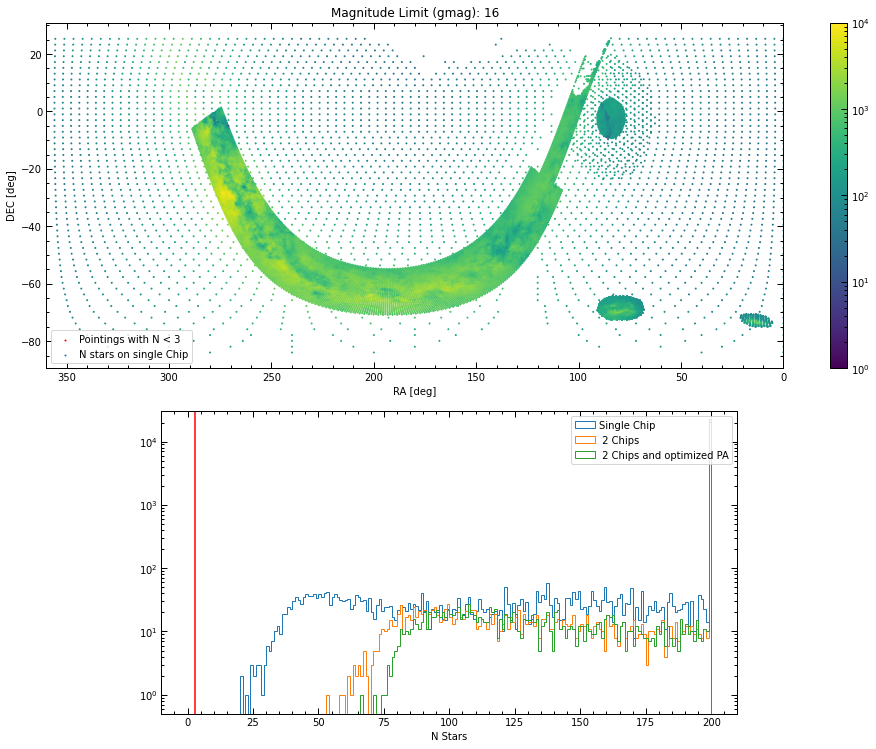

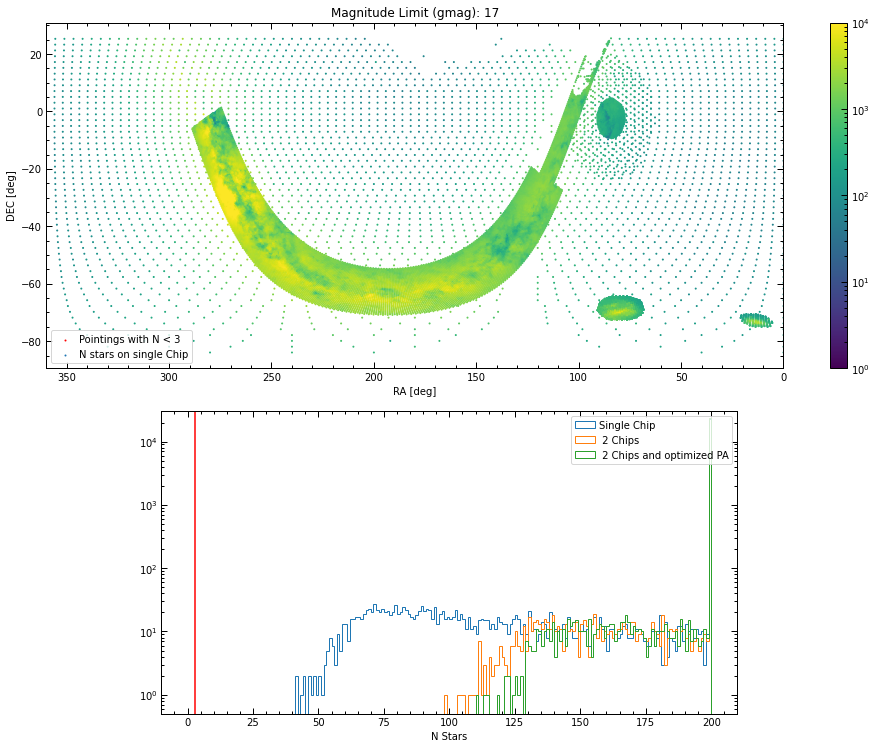

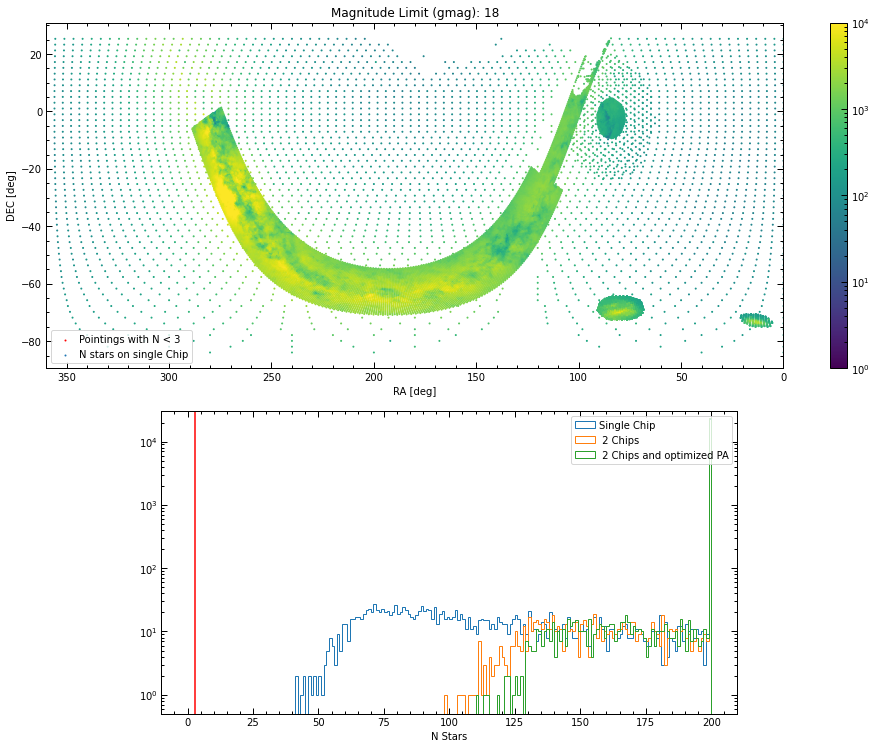

In [46]:
#Version for many separate plots

for index2,mag_lim in enumerate(min_mags[:]):
    fig = plt.figure(figsize=(16,12))
    
    ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4])
    ax2 = fig.add_axes([0.2, 0.1, 0.5, 0.35])
    
    #fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(20,16),gridspec_kw={'width_ratios': [2, 1]})
    ax1.set_title("Magnitude Limit (gmag): "+str(mag_lim))
    my_plot2 = ax1.scatter(ra_pointings[n_stars[:,index2]<3],dec_pointings[n_stars[:,index2]<3],c="r",s=1,marker="o",label="Pointings with N < 3")
    my_plot = ax1.scatter(ra_pointings[n_stars[:,index2]>=3],dec_pointings[n_stars[:,index2]>=3],c=n_stars[:,index2][n_stars[:,index2]>=3],norm=LogNorm(vmin=1,vmax=10000),s=1,marker="o",label="N stars on single Chip")
    
    my_cb = plt.colorbar(my_plot,ax=ax1)
    my_cb.set_label ="N stars"
    ax1.legend()
    bins = np.arange(0,201,1)
    
    ax2.hist(np.clip(n_stars_single[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label="Single Chip")
    ax2.hist(np.clip(n_stars_double[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label=" 2 Chips")
    ax2.hist(np.clip(n_stars_opti[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step', label=" 2 Chips and optimized PA")

    ax1.set_xlabel("RA [deg]")
    ax1.set_ylabel("DEC [deg]")
    
    ax2.set_xlabel("N Stars")
    ax2.axvline(3,color="r")
    ax1.set_xlim(360,0)
    ax2.set_yscale("log")
    ax2.set_ylim(0.5,3e4)
    ax2.legend(loc="upper right")
    #ax2.set_xlim(0,101)
    fig.savefig("/home/haeberle/exchange/lvm/report/20210422_count_guidestars_{:d}.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)
    
    plt.show()
#ax.plot(ra_pointings,dec_pointings,".")



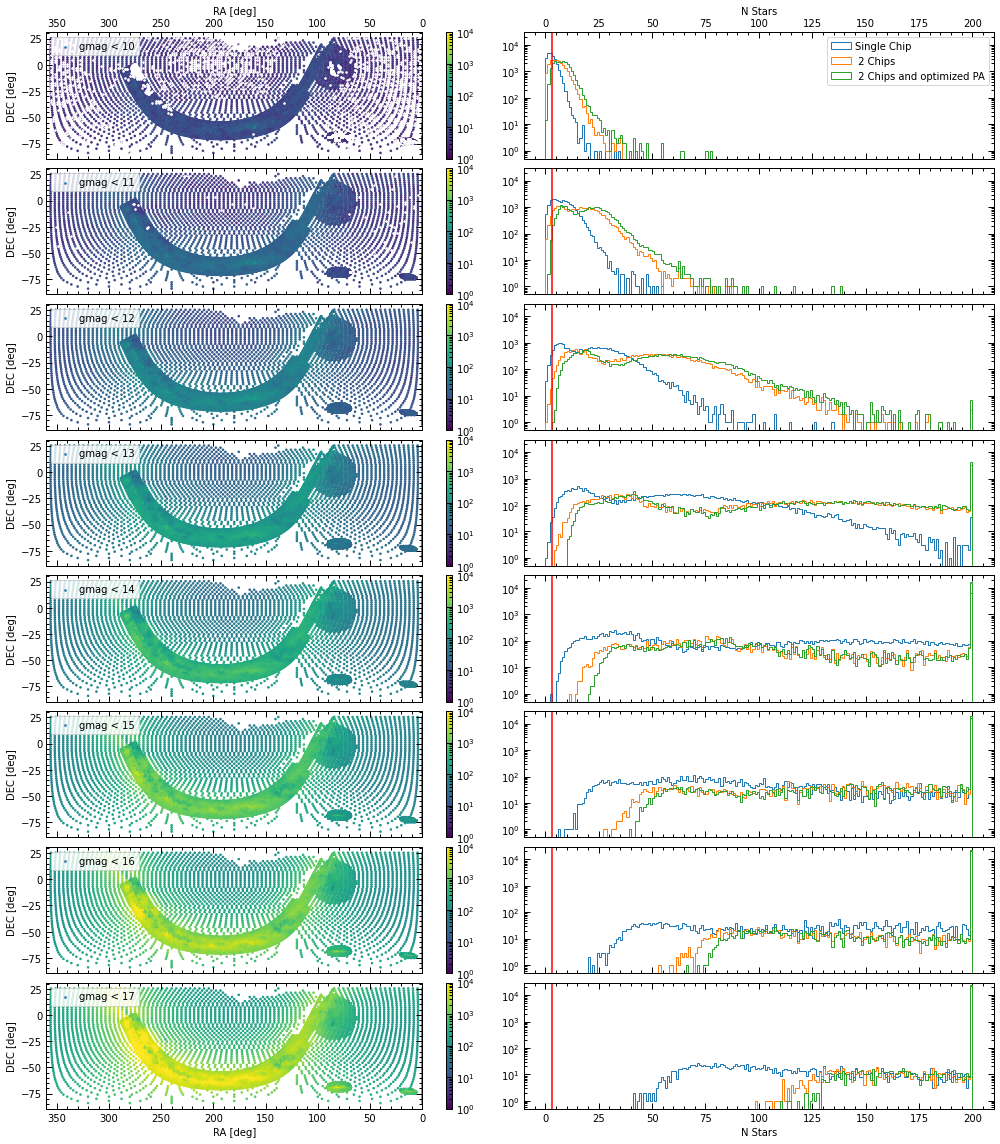

In [456]:
#Version for one single plot

fig,axarr = plt.subplots(ncols=2,nrows=len(min_mags)-1,figsize=(14,16))

for index2,mag_lim in enumerate(min_mags[:-1]):

    ax1 = axarr[index2][0]
    ax2 = axarr[index2][1]
    
    
    
    #ax1.set_title("Magnitude Limit (gmag): "+str(mag_lim))
    my_plot = ax1.scatter(ra_pointings,dec_pointings,c=n_stars[:,index2],norm=LogNorm(vmin=1,vmax=10000),s=10,marker=".",label="gmag < "+str(mag_lim))
    my_plot2 = ax1.scatter(ra_pointings[n_stars[:,index2]<3],dec_pointings[n_stars[:,index2]<3],c="w",s=10,marker=".")
    plt.colorbar(my_plot,ax=ax1)

    bins = np.arange(0,201,1)
    
    ax2.hist(np.clip(n_stars_single[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label="Single Chip")
    ax2.hist(np.clip(n_stars_double[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label=" 2 Chips")
    ax2.hist(np.clip(n_stars_opti[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step', label=" 2 Chips and optimized PA")

    
    ax1.set_ylabel("DEC [deg]")
    
    
    ax2.axvline(3,color="r")
    ax1.set_xlim(360,0)
    ax2.set_yscale("log")
    ax2.set_ylim(0.5,3e4)
    
    
    ax1.legend(loc="upper left")
    if index2 ==0:
        ax2.legend(loc="upper right")
        ax1.set_xlabel("RA [deg]")
        ax2.set_xlabel("N Stars")   
        ax1.xaxis.set_label_position('top')
        ax2.xaxis.set_label_position('top')
        ax1.tick_params(labelbottom=False,labeltop=True)
        ax2.tick_params(labelbottom=False,labeltop=True)
    if index2 ==7:
        ax1.set_xlabel("RA [deg]")
        ax2.set_xlabel("N Stars")
    elif index2!=0:
        ax1.xaxis.set_ticklabels([])
        ax2.xaxis.set_ticklabels([])
    #ax2.set_xlim(0,101)
    #fig.savefig("/home/haeberle/exchange/lvm/report/count_guidestars_{:d}.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)
    
    #plt.show()
#ax.plot(ra_pointings,dec_pointings,".")

fig.tight_layout()
fig.subplots_adjust(hspace = .075)

fig.savefig("/home/haeberle/exchange/lvm/report/count_guidestars_combined_small.png",bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)

(array([ 63., 279., 482., 651., 826., 844., 752., 695., 625., 548., 432.,
        365., 329., 264., 228., 211., 207., 148., 173., 106., 132., 103.,
         94.,  99.,  89.,  72.,  72.,  70.,  46.,  58.,  51.,  57.,  35.,
         48.,  33.,  33.,  25.,  24.,  24.,  14.,  18.,   8.,  13.,   9.,
          7.,   9.,   6.,   3.,   3.,   9.,   5.,   1.,   2.,   2.,   4.,
          4.,   2.,   0.,   2.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 

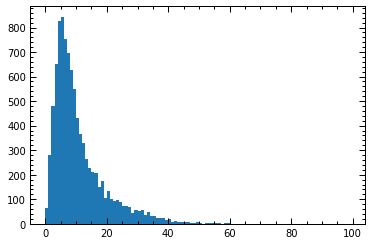

In [15]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(14,12))
    fig.suptitle("Magnitude Limit (gmag): "+str(mag_lim))
    my_plot = ax1.scatter(ra_pointings,dec_pointings,c=n_stars[:,index2],norm=LogNorm(vmin=1,vmax=10000),s=200,marker=".")
    my_plot2 = ax1.scatter(ra_pointings[n_stars[:,index2]<3],dec_pointings[n_stars[:,index2]<3],c="w",s=200,marker=".")
    plt.colorbar(my_plot,ax=ax1)
fig,ax = plt.subplots()



In [81]:
dec_pointings.shape

(9520,)

In [77]:
5.5%5

0.5

In [82]:
n_stars[:-1].shape

(9519, 7)

In [48]:
np.argmax(n_stars[:,-1])

5419

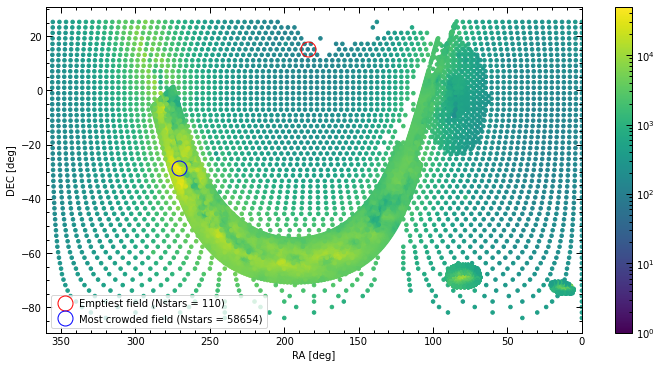

In [453]:
fig,ax1 = plt.subplots(figsize=(12,6))
#fig.suptitle("Magnitude Limit (gmag): "+str(mag_lim))


nstars = n_stars_opti

my_plot = ax1.scatter(ra_pointings,dec_pointings,c=n_stars[:,-1],norm=LogNorm(vmin=1,vmax=50000),s=50,marker=".")


ax1.plot(ra_pointings[np.argmin(n_stars[:,-1])],dec_pointings[np.argmin(n_stars[:,-1])],markeredgecolor="r",marker="o",ls="",ms=15,markerfacecolor="none",label="Emptiest field (Nstars = "+str(int(min(n_stars[:,-1])))+")")
ax1.plot(ra_pointings[np.argmax(n_stars[:,-1])],dec_pointings[np.argmax(n_stars[:,-1])],markeredgecolor="b",marker="o",ls="",ms=15,markerfacecolor="none",label="Most crowded field (Nstars = "+str(int(max(n_stars[:,-1])))+")")

plt.colorbar(my_plot,ax=ax1)

ax1.set_xlabel("RA [deg]")
ax1.set_ylabel("DEC [deg]")
ax1.set_xlim(360,0)
ax1.legend(loc="lower left")
fig.savefig("/home/haeberle/exchange/lvm/report/special_fields.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)

### Galactic coordinates

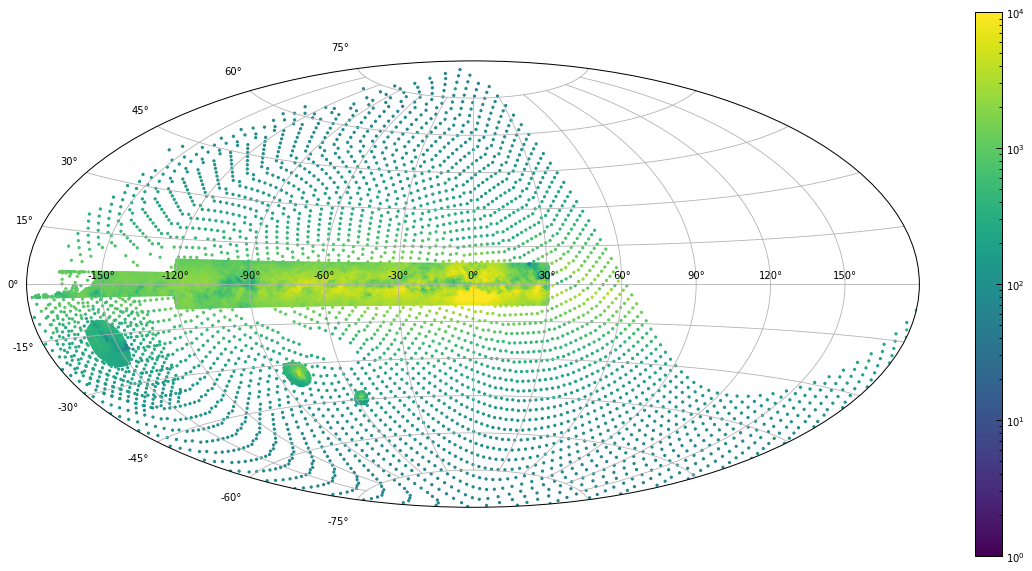

In [14]:
c = SkyCoord(ra=ra_pointings*u.degree, dec=dec_pointings*u.degree)
b = c.transform_to("galactic")

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='aitoff')
ax.grid()



my_plot = ax.scatter((((b.l.value+180)%360)-180)*np.pi/180,b.b.value*np.pi/180,c=n_stars[:,-1],norm=LogNorm(vmin=1,vmax=10000),s=20,marker=".")

plt.colorbar(my_plot,ax=ax)

fig.savefig("/home/haeberle/exchange/lvm/galactic_map.png",bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)

## Synthetic image creation

In [300]:
mag_lim_index = -2
print("Mag Limit: ",min_mags[mag_lim_index])

print()
n_stars = n_stars_single
print("Single Chip: ")
print("Pointing number with smallest number of sources: {:06d} ({:d} sources)".format(np.argmin(n_stars[:,mag_lim_index]),int(np.min(n_stars[:,mag_lim_index]))))
print("Pointing number with largest number of sources:  {:06d} ({:d} sources)".format(np.argmax(n_stars[:,mag_lim_index]),int(np.max(n_stars[:,mag_lim_index]))))

print()
n_stars = n_stars_double
print("Double Chip: ")
print("Pointing number with smallest number of sources: {:06d} ({:d} sources)".format(np.argmin(n_stars[:,mag_lim_index]),int(np.min(n_stars[:,mag_lim_index]))))
print("Pointing number with largest number of sources:  {:06d} ({:d} sources)".format(np.argmax(n_stars[:,mag_lim_index]),int(np.max(n_stars[:,mag_lim_index]))))

print()
n_stars = n_stars_opti
print("Double Chip and optimized PA: ")
print("Pointing number with smallest number of sources: {:06d} ({:d} sources)".format(np.argmin(n_stars[:,mag_lim_index]),int(np.min(n_stars[:,mag_lim_index]))))
print("Pointing number with largest number of sources:  {:06d} ({:d} sources)".format(np.argmax(n_stars[:,mag_lim_index]),int(np.max(n_stars[:,mag_lim_index]))))

Mag Limit:  17

Single Chip: 
Pointing number with smallest number of sources: 001017 (41 sources)
Pointing number with largest number of sources:  005419 (31745 sources)

Double Chip: 
Pointing number with smallest number of sources: 001017 (98 sources)
Pointing number with largest number of sources:  005419 (55329 sources)

Double Chip and optimized PA: 
Pointing number with smallest number of sources: 002958 (110 sources)
Pointing number with largest number of sources:  004854 (58654 sources)


In [426]:
for mag_lim_index in range(len(min_mags)):
    

#print()
    n_stars = n_stars_single
    single_min = int(np.min(n_stars[:,mag_lim_index]))
    single_max = int(np.max(n_stars[:,mag_lim_index]))

    n_stars = n_stars_double
    double_min = int(np.min(n_stars[:,mag_lim_index]))
    double_max = int(np.max(n_stars[:,mag_lim_index]))

    n_stars = n_stars_opti
    opti_min = int(np.min(n_stars[:,mag_lim_index]))
    opti_max = int(np.max(n_stars[:,mag_lim_index]))
    
    print("{:6.3f}{:6d}{:6d}{:6d}{:6d}{:6d}{:6d}".format(min_mags[mag_lim_index],single_min,single_max,double_min,double_max,opti_min,opti_max))


10.000     0    42     0    77     0    77
11.000     0    75     0   138     1   138
12.000     0   134     0   234     3   234
13.000     0   281     4   481    10   560
14.000     2   712    11  1293    20  1438
15.000     6  2418    27  4570    39  4600
16.000    20  9167    53 17119    66 17119
17.000    41 31745    98 55329   110 58654
18.000    41 31745    98 55329   110 58654


In [371]:

np.median(n_stars_single[:,mag_lim_index])

1485.0

In [373]:
np.where(n_stars_single[:,mag_lim_index]==1485.0)

(array([ 3429,  4380,  9104, 13672, 15797, 16446, 20855, 20914, 20998,
        21232]),)

In [418]:

pointing_string = "001017" #Empty
#pointing_string = "003429" #Median
#pointing_string = "005419" #Crowded

filename = "guide_star_search_results/guide_stars_"+pointing_string+"_pa_000"
#filename = "guide_star_search_results/guide_stars_005419_pa_000"

In [419]:
ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.loadtxt(filename)
#gmag = np.linspace(10,20,100)

In [420]:
np.median(ras)

21.160037

In [423]:
np.median(decs)

-16.72564

### Instrumental parameters and observing conditions

In [412]:
chip_height=10.2     #mm, guide chip height                    # taken from SDSS-V_0129_LVMi_PDR.pdf Table 13
chip_width=14.4
pixel_height=1100
pixel_width = 1600
image_scale=8.92 # 1arcsec in microns

sky_flux = 10 #e-/second/pixel (Half the full moon flux with optimistic assumptions)
dark_current = 15 #e-/second/pixel
readout_noise = 5 #e-


bias = 100 #e-, arbitrary value chosen to avoid negative counts

exp_time = 0.1 #s

a_telescope = np.pi*(16.2/2)**2

flux_of_vega = a_telescope * 1.6e6 #e-/sec/cm2 #This is for the optimistic case, in the pessimistic case the number would be 8.71e5
#flux_of_vega = a_telescope * 8.71e5
zp = -2.5*np.log10(flux_of_vega)

seeing_arcsec = 3.5 #fwhm


seeing_pixel = seeing_arcsec*image_scale / (chip_width/pixel_width*1000) / 2.36
print("Sigma of seeing in pixel: ",seeing_pixel)

Sigma of seeing in pixel:  1.4698681732580035


In [413]:
#Calculations based on above parameters

x_position = chip_xxs / chip_width * pixel_width
y_position = chip_yys / chip_height * pixel_height
#gmag = np.array(mags)


gaia_legend_mag = np.arange(17,4,mag_lim_index)
gaia_legend_flux= 10**(-(np.array(gaia_legend_mag)+zp)/2.5)
gaia_flux = 10**(-(gmag+zp)/2.5)


background = (sky_flux+dark_current)*exp_time
n_pix = 7*7


background_noise = np.sqrt(background+readout_noise**2)
signal = gaia_flux*exp_time
noise = np.sqrt(readout_noise**2+signal+n_pix*background)


sn = signal/noise



print("Nstars: ",x_position.shape)

Nstars:  (31745,)



### Add stars

In [414]:
star_image = np.zeros((pixel_height,pixel_width))

for index, current_flux in enumerate(gaia_flux):
    current_x = x_position[index]
    current_y = y_position[index]
    
    i = int(current_x)
    j = int(current_y)

    xx = current_x-i
    yy = current_y-j

    #
    #test_image[j,i] = current_f


    star_image[j,i] = (1-xx)*(1-yy)*current_flux*exp_time
    
    
    if i<pixel_width-1:
        star_image[j,i+1] = (xx)*(1-yy)*current_flux*exp_time
    if j< pixel_height-1:
        star_image[j+1,i] = (1-xx)*(yy)*current_flux*exp_time
    if (i<pixel_width-1) & (j<pixel_height-1):
        star_image[j+1,i+1] = (xx)*(yy)*current_flux*exp_time
    
    #star_image[int(current_y),int(current_x)] = current_flux*exp_time

    
star_image_c = gaussian_filter(star_image, sigma=seeing_pixel,mode="constant")


star_image_c_noise = np.random.poisson(lam=star_image_c,size = star_image_c.shape)


### Add Background

In [415]:
background_array = np.random.poisson(background,size=star_image.shape)

readout_noise_array = np.random.normal(loc=0,scale = readout_noise,size=star_image.shape)

combined = star_image_c_noise + background_array + readout_noise_array + bias

#hdu = fits.PrimaryHDU(star_image_c)
#hdu.writeto("/home/haeberle/exchange/lvm/synthetic_image_sparse_field_5s.fits",overwrite=True)

hdu = fits.PrimaryHDU(combined)


filename = "/home/haeberle/exchange/lvm/synthetic_images/pointing_"+pointing_string+"_{:d}ms.fits".format(int(1000*exp_time))
print("writing file: ",filename)
hdu.writeto(filename,overwrite=False)


writing file:  /home/haeberle/exchange/lvm/synthetic_images/pointing_005419_100ms.fits


OSError: File '/home/haeberle/exchange/lvm/synthetic_images/pointing_005419_100ms.fits' already exists.

### Plot images

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
ax.set_title("{} of {} stars have a S/N > 5".format(np.sum(sn>5),len(sn)))
ax.plot(gmag,sn,"k.")
ax.grid()
ax.axhline(5,color="r",ls="--",label=" S/N = 5")
ax.set_yscale("log")
ax.set_xlabel("Gaia gmag")
ax.set_ylabel("S/N")
ax.legend()

fig,ax = plt.subplots(figsize=(8,4))
#ax.set_title("{} of {} stars have a S/N > 5".format(np.sum(sn>5),len(sn)))
ax.plot(gmag,sn1,"c",label="1 s")
ax.plot(gmag,sn5,"b",label="5 s")
ax.plot(gmag,sn25,"k",label="25 s")
ax.grid()
ax.axhline(5,color="r",ls="--",label=" S/N = 5")
ax.set_yscale("log")
ax.set_xlabel("Gaia gmag")
ax.set_ylabel("S/N")
ax.legend()
#fig.savefig("/home/haeberle/exchange/lvm/report/sn_pessimistic.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)


Text(0.5, 0.98, 'Pointing: 005419\nExp. time: 0.1 s')

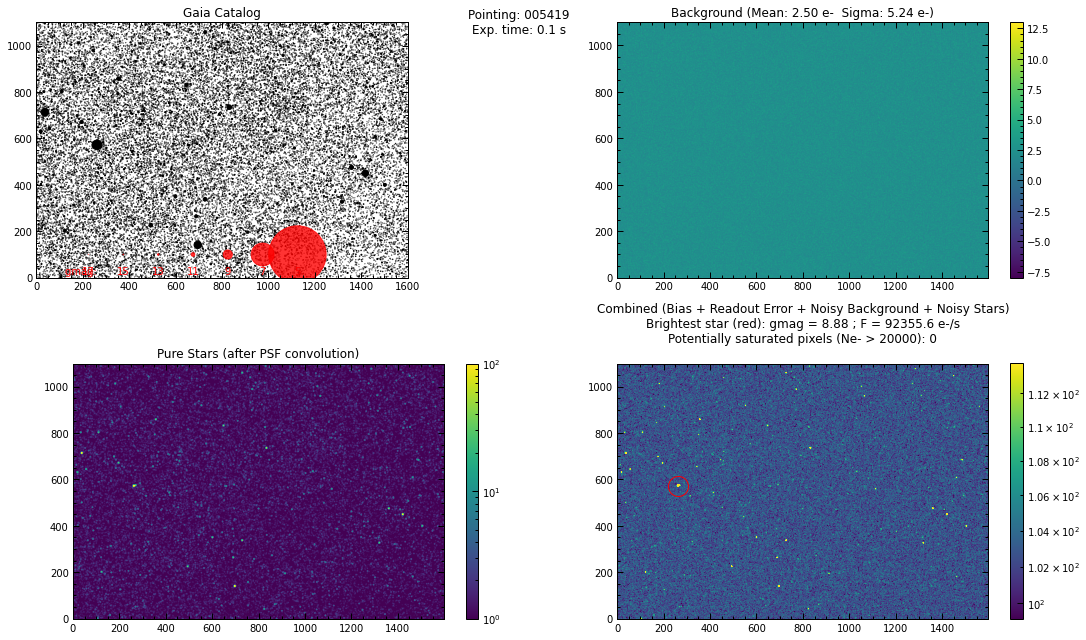

In [416]:
fig,((ax,ax2),(ax3,ax4)) = plt.subplots(figsize=(16,9),ncols=2,nrows=2)



ax.set_title("Gaia Catalog")
ax.scatter(x_position,y_position,s=gaia_flux/1000,c="k")
ax.set_aspect("equal")
text_x = 1500-gaia_legend_mag*75#-300
text_y = 100*np.ones_like(gaia_legend_mag)
ax.scatter(text_x,text_y,s=gaia_legend_flux/1000,c="r",alpha=0.8)
for n,current_gmag in enumerate(gaia_legend_mag):
    ax.text(text_x[n],text_y[n]-85,"{}".format(current_gmag),c="r",ha="center")
    
ax.text(text_x[0]-100,text_y[0]-85,"gmag: ",c="r")

ax.set_ylim(0,pixel_height)
ax.set_xlim(0,pixel_width)


vmin3 = 1#np.percentile(star_image_c,50)
vmax3 = np.percentile(star_image_c,99.9)
my_plot = ax3.imshow(star_image_c+1,origin="lower",norm=LogNorm(vmin=1, vmax=100))
plt.colorbar(my_plot,ax=ax3,fraction=0.046, pad=0.04)
ax3.set_title("Pure Stars (after PSF convolution)")


#fig,ax = plt.subplots(figsize=(16,12))
my_plot2 = ax2.imshow(background_array,origin="lower",vmin=background-2*background_noise,vmax=background+2*background_noise)#,vmin=5,vmax=20)
ax2.set_title("Background (Mean: {:.2f} e-  Sigma: {:.2f} e-)".format(background,background_noise))
plt.colorbar(my_plot2,ax=ax2,fraction=0.046, pad=0.04)

#fig,ax = plt.subplots(figsize=(16,12))

vmin4 = np.percentile(combined,25)
vmax4 = np.percentile(combined,98)

my_plot4 = ax4.imshow(combined,origin="lower",norm=LogNorm(vmin=np.max([vmin4,1]), vmax=vmax4))
if np.sum(sn>5) < 10:
    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\nWhite circle around all stars with S/N > 5 (N = {})".format(np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000),np.sum(sn>5)))
    ax4.plot(x_position[sn>5],y_position[sn>5],"o",ms=40,markerfacecolor="none",markeredgecolor="w",label="gmag < 12")
else:
    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\n".format(np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000)))
ax4.plot(x_position[np.argmin(gmag)],y_position[np.argmin(gmag)],"o",ms=20,markerfacecolor="none",markeredgecolor="r",label="gmag < 12")
plt.colorbar(my_plot4,ax=ax4,fraction=0.046, pad=0.04)
#plt.colorbar(my_plot4,ax=ax,fraction=0.046, pad=0.04)
#ax4.legend()

fig.tight_layout()
fig.suptitle("Pointing: "+pointing_string+"\nExp. time: "+str(exp_time)+" s")
#fig.savefig("/home/haeberle/exchange/lvm/report/example_crowded_field.png",dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")
#fig.savefig("/home/haeberle/exchange/lvm_guidestars_synthetic_image.png",dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")

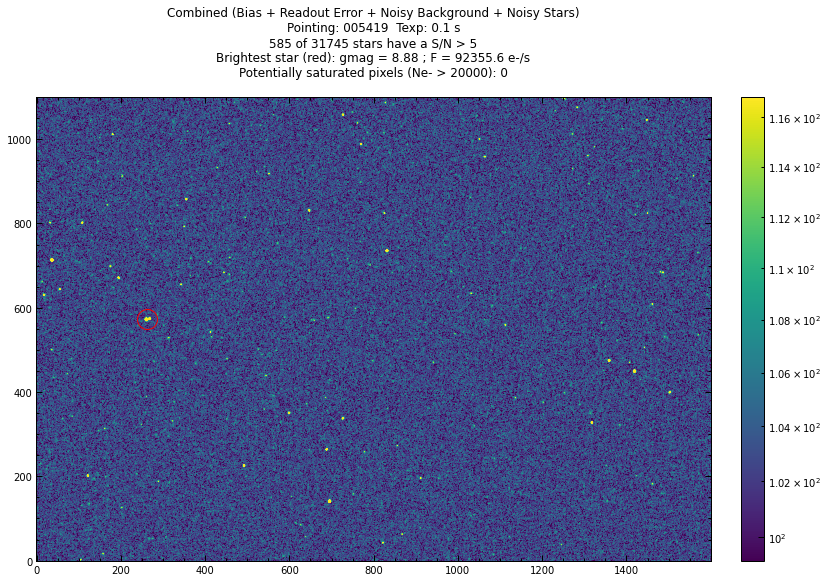

In [417]:
fig,ax4 = plt.subplots(figsize=(12,8))

vmin4 = np.percentile(combined,25)
vmax4 = np.percentile(combined,99.5)

my_plot4 = ax4.imshow(combined,origin="lower",norm=LogNorm(vmin=np.max([vmin4,1]), vmax=vmax4))
if np.sum(sn>5) < 10:
    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\nWhite circle around all stars with S/N > 5 (N = {})".format(np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000),np.sum(sn>5)))
    ax4.plot(x_position[sn>5],y_position[sn>5],"o",ms=40,markerfacecolor="none",markeredgecolor="w",label="gmag < 12")
else:
    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nPointing: {}  Texp: {} s\n{} of {} stars have a S/N > 5\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\n".format(pointing_string,exp_time,np.sum(sn>5),len(gmag),np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000)))
ax4.plot(x_position[np.argmin(gmag)],y_position[np.argmin(gmag)],"o",ms=20,markerfacecolor="none",markeredgecolor="r",label="gmag < 12")
plt.colorbar(my_plot4,ax=ax4,fraction=0.046, pad=0.04)
#plt.colorbar(my_plot4,ax=ax,fraction=0.046, pad=0.04)
#ax4.legend()

fig.tight_layout()

filename = "/home/haeberle/exchange/lvm/report/pointing_"+pointing_string+"_{:d}ms.png".format(int(1000*exp_time))
#fig.suptitle()
#fig.savefig("/home/haeberle/exchange/lvm/report/example_crowded_field.png",dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")
fig.savefig(filename,dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")

Text(0.5, 0, 'N e-')

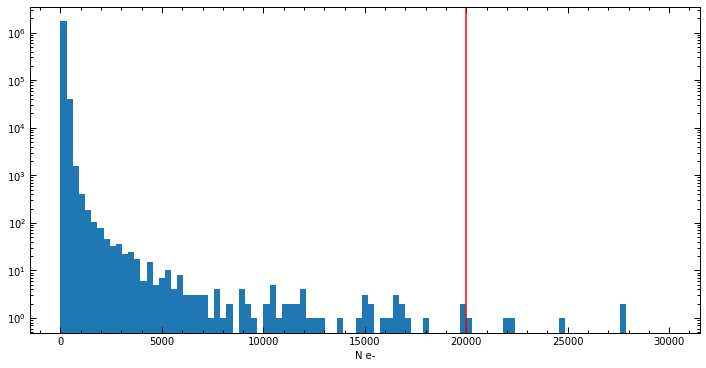

In [174]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(combined.flatten(),bins=np.linspace(0,30000,100))
ax.axvline(20000,color="r")
ax.set_yscale("log")
ax.set_xlabel("N e-")
#ax.set_xscale("log")

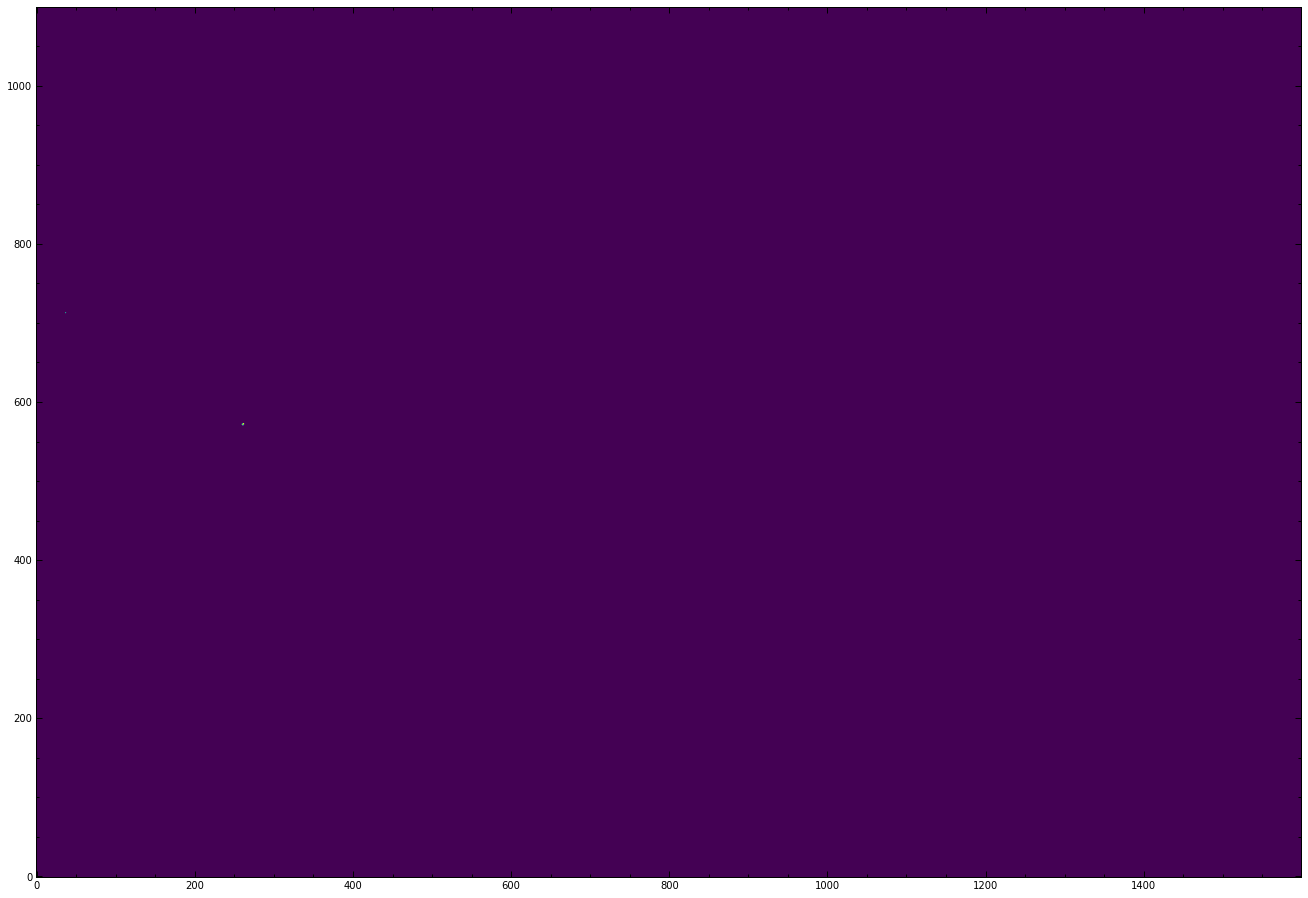

In [175]:
fig,ax = plt.subplots(figsize=(24,16))

ax.imshow(combined>20000,origin="lower")

In [68]:
combined.max()

29984.25056385428

In [113]:
combined.max()

194688.691583654

In [109]:
np.percentile(combined,98)

200.77052344231691

In [110]:
vmin4

119.91922824413089

### Test centroiding

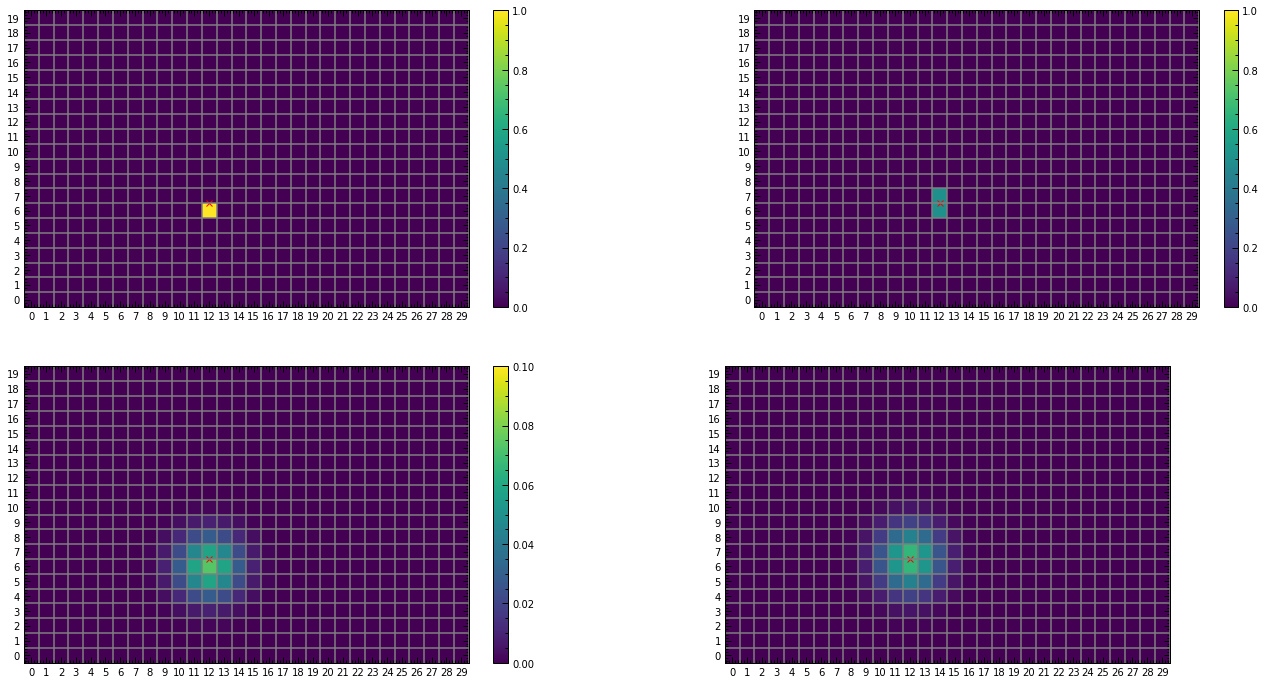

In [111]:
test_image = np.zeros((20,30))
test_image2= np.zeros((20,30))
current_x = 12.0
current_y = 6.5
current_f = 1

i = int(current_x)
j = int(current_y)

xx = current_x-i
yy = current_y-j

test_image[j,i] = current_f

test_image2[j,i] = (1-xx)*(1-yy)*current_f
test_image2[j,i+1] = (xx)*(1-yy)*current_f
test_image2[j+1,i] = (1-xx)*(yy)*current_f
test_image2[j+1,i+1] = (xx)*(yy)*current_f


fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(24,12))

im1 = ax1.imshow(test_image,vmin=0,vmax=1,origin="lower")
im2 = ax2.imshow(test_image2,vmin=0,vmax=1,origin="lower")

test_image3 = gaussian_filter(test_image, sigma=seeing_pixel,mode="constant")
test_image4 = gaussian_filter(test_image2, sigma=seeing_pixel,mode="constant")

im3 = ax3.imshow(test_image3,vmin=0,vmax=0.1,origin="lower")
im4 = ax4.imshow(test_image4,vmin=0,vmax=0.1,origin="lower")


for ax in [ax1,ax2,ax3,ax4]:
    ax.plot(current_x,current_y,"rx")
    ax.set_xticks(np.arange(0.0,30,1))
    ax.set_yticks(np.arange(0.0,20,1))
    #ax.grid()

    for x in np.arange(0.5,30,1):
        ax.axvline(x,color="0.5")
    for y in np.arange(0.5,20,1):
        ax.axhline(y,color="0.5")
plt.colorbar(im1,ax=ax1,fraction=0.046, pad=0.04)
plt.colorbar(im2,ax=ax2,fraction=0.046, pad=0.04)
plt.colorbar(im3,ax=ax3,fraction=0.046, pad=0.04)

In [91]:
def find_com(ii,jj,image,a=5):
    x_values = np.arange(ii-a,ii+a+1)
    y_values = np.arange(jj-a,jj+a+1)


    combined = np.stack((np.tile(y_values,2*a+1),np.repeat(x_values,2*a+1)),axis=1)

    x_sum = 0
    y_sum = 0
    n_sum = 0
    for coords in combined:
        #print(coords[1],coords[0])
        x_sum+=(coords[1]) * image[coords[0],coords[1]]
        y_sum+=(coords[0]) * image[coords[0],coords[1]]

        n_sum+=image[coords[0],coords[1]]
        
    x_com = x_sum/n_sum
    y_com = y_sum/n_sum
    
    return x_com,y_com


def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [92]:
jj,ii = np.unravel_index(test_image4.argmax(), test_image4.shape)

x_brightest = ii
y_brightest = jj

a = 5

x_com,y_com = find_com(ii,jj,test_image4,a=a)

gauss_height, gauss_center_y, gauss_center_x, gauss_width_y, gauss_width_x = fitgaussian(test_image4[jj-a:jj+a+1,ii-a:ii+a+1])



gauss_center_x+=ii-a
gauss_center_y+=jj-a


print("Original position:   x = {:6.3f}    y = {:6.3f}".format(current_x,current_y))
print("Brightest pixel:     x = {:6.3f}    y = {:6.3f}".format(x_brightest,y_brightest))
print("Center of mass:      x = {:6.3f}    y = {:6.3f}".format(x_com,y_com))
print("Fit of 2D Gaussian:  x = {:6.3f}    y = {:6.3f}  (Seeing x: {:6.3f} Seeing y: {:6.3f})".format(gauss_center_x,gauss_center_y,gauss_width_x*2.36,gauss_width_y*2.36))

Original position:   x = 12.000    y =  6.500
Brightest pixel:     x = 12.000    y =  6.000
Center of mass:      x = 12.000    y =  6.498
Fit of 2D Gaussian:  x = 12.000    y =  6.500  (Seeing x:  3.469 Seeing y:  3.675)
